<a href="https://colab.research.google.com/github/blessjal/practicums/blob/master/hwk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [8]:
auto = pd.read_csv('/content/sample_data/Auto.txt')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
auto.shape

(397, 9)

**1(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median and a 0 if mpg contains a value below its medi**an

In [16]:
mpg_med = auto.mpg.median()
auto['mpg01'] = np.where(auto.mpg > mpg_med, 1, 0)

In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


**1(b) Explore the data graphically in order to investigate the association 
between mpg01 and the other features using scatterplots and boxplots. Describe your findings.**

In [ ]:
auto.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,mpg01
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,0.837419
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,-0.736711
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,-0.736608
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,-0.745046
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,0.316618
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,0.448150
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,0.512200
mpg01,0.837419,-0.736711,-0.736608,-0.745046,0.316618,0.448150,0.512200,1.000000


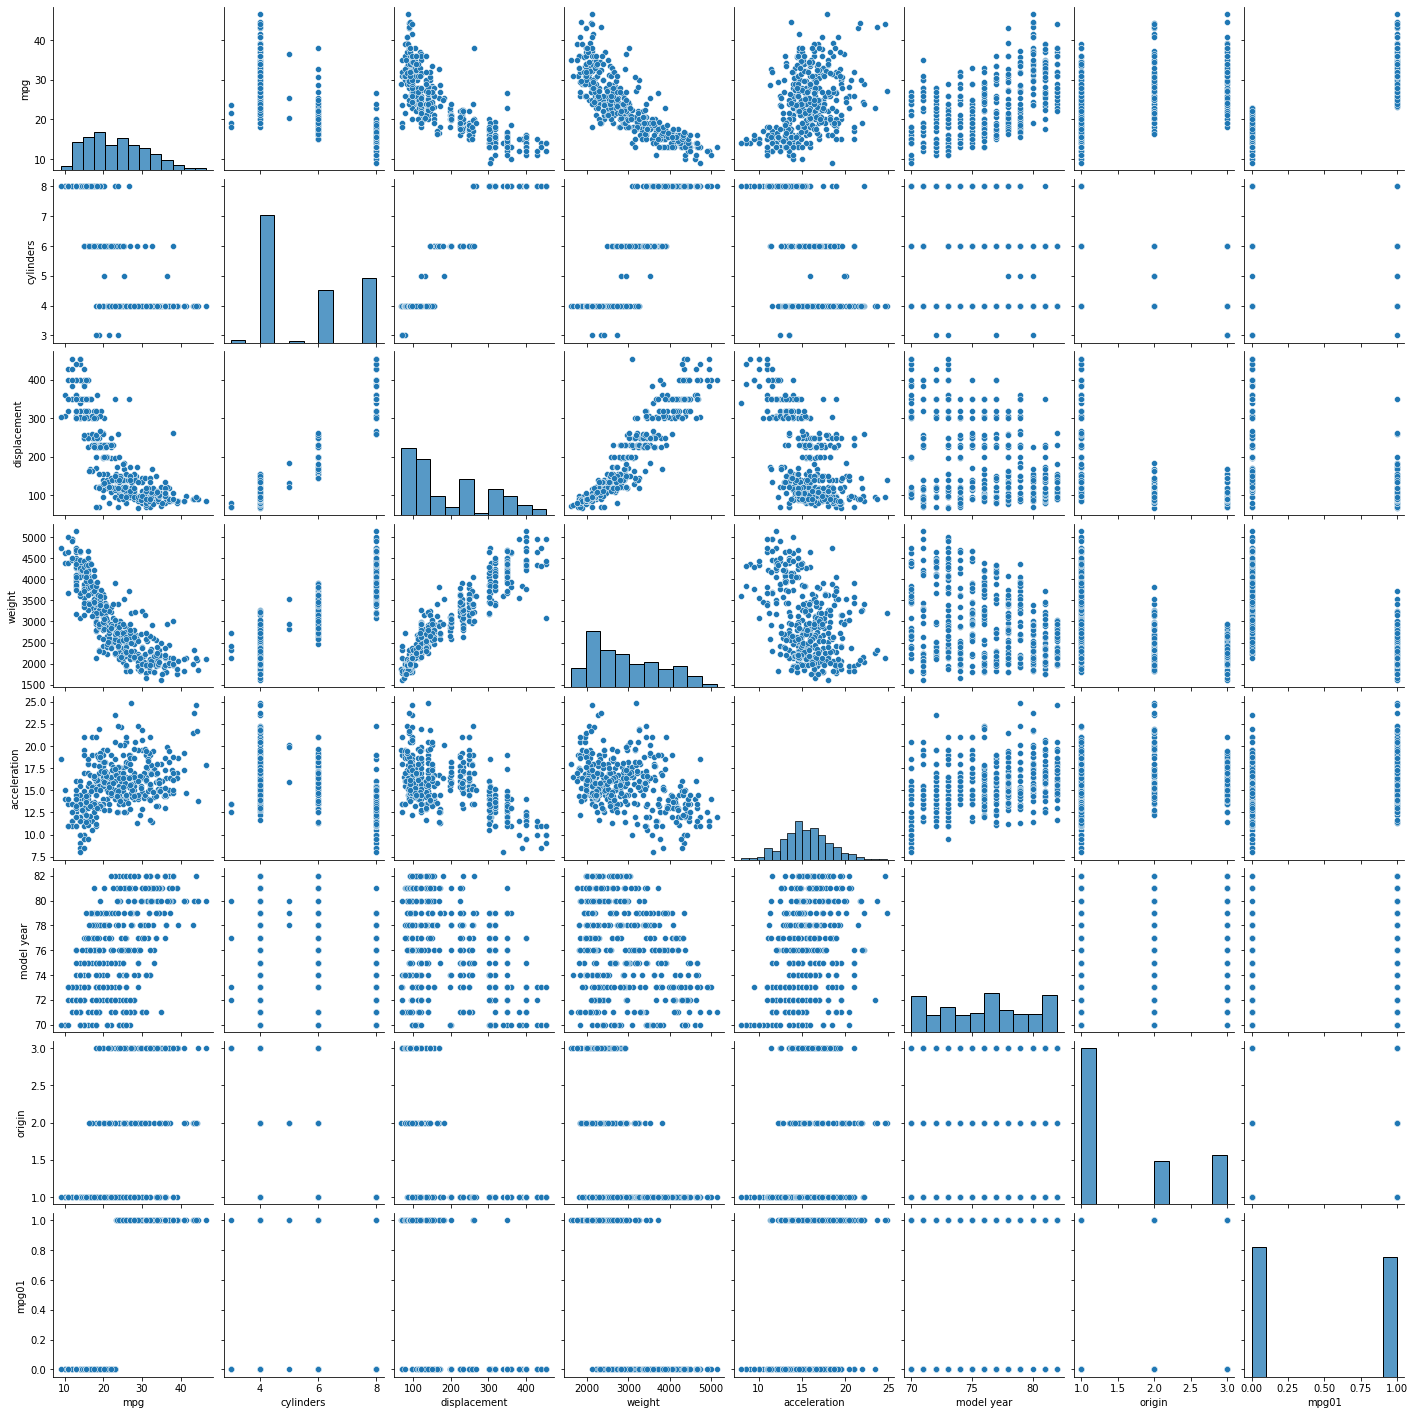

In [ ]:
sns.pairplot(auto)

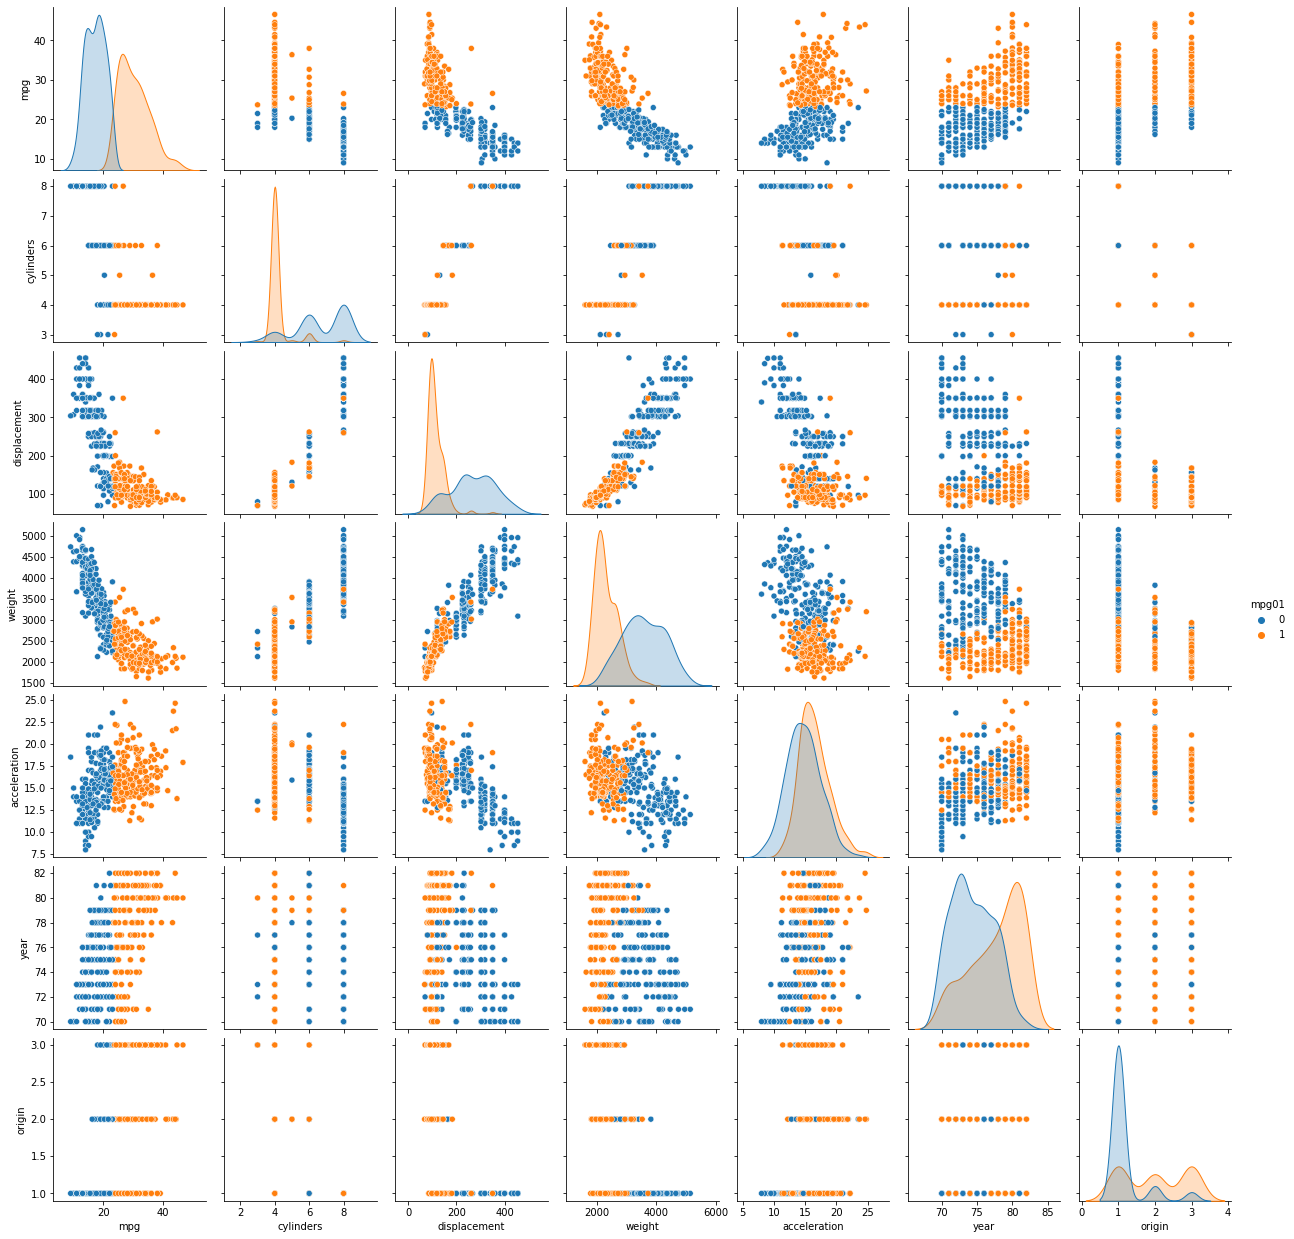

In [18]:
sns.pairplot(auto, hue='mpg01')

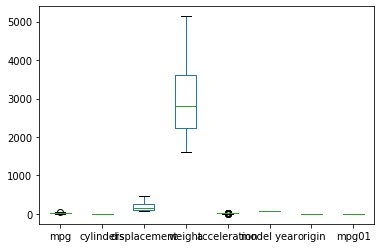

In [ ]:
auto.plot(kind='box')

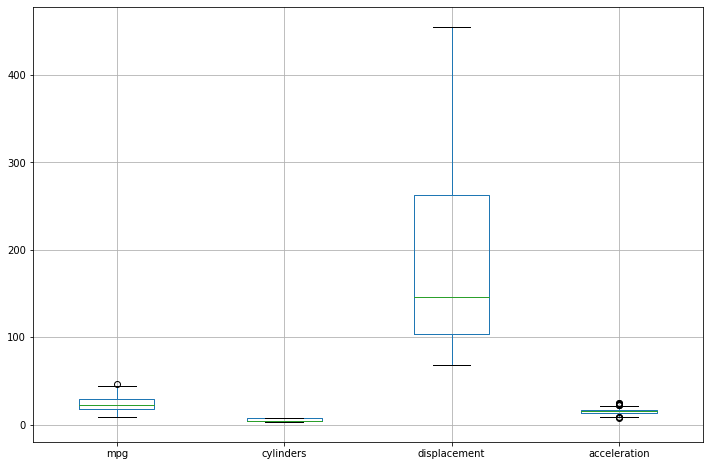

In [9]:
auto.boxplot(column=['mpg', 'cylinders', 'displacement', 'acceleration'], figsize=(12, 8))


**Data Processing **

The horsepower column contains a '?' and so I tried to remove it by imputation

In [10]:
auto['horsepower'].replace('?', np.nan, inplace=True)
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
auto.horsepower.replace(np.nan, '100', inplace=True)
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

I then changed the horsepower type from object to integer

In [12]:
auto.horsepower.astype('int')

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: int64

**1(c) Split the dat into a training set and test set**

In [21]:
X = auto.drop(['mpg01', 'name', 'origin'], axis=1)
y = auto['mpg01']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(317, 7)
(80, 7)
(317,)
(80,)


**Transform data using StandardScalar()**

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**1(d) Perform a logistic regressio on the training data in order to predict mpg01 using variables that seemed most associated with mpg01. Calculate the test error.**

In [24]:
lr = LogisticRegression()
lr_fit = lr.fit(X_train, y_train)

In [25]:
y_pred = lr.predict(X_test)

In [26]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [27]:
y_test

65     0
132    1
74     0
78     0
37     0
      ..
268    1
234    1
145    1
164    0
124    0
Name: mpg01, Length: 80, dtype: int64

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the logistic regression model is: ', accuracy)

The accuracy of the logistic regression model is:  0.9625


In [29]:
mse = mean_squared_error(y_test, y_pred)
mse

0.0375

In [30]:
error = np.sqrt(mse)

print('The error of the logistic regression model is:', error)

The error of the logistic regression model is: 0.19364916731037085


In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  3],
       [ 0, 38]])

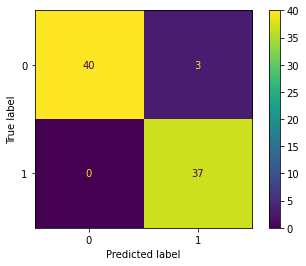

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(lr_fit, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.93      1.00      0.96        37

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



**1(e) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation error associated with differnt values of this parameter.**

In [40]:
from sklearn import svm
from sklearn.svm import SVC
import random

# C=1
svm_model = SVC(C=1)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model is ', svm_accuracy)

The accuracy of the svm model is  0.9625


In [41]:
# C=5
svm_model = SVC(C=5)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model is ', svm_accuracy)

The accuracy of the svm model is  0.9625


In [42]:
# C=10
svm_model = SVC(C=10)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model is ', svm_accuracy)

The accuracy of the svm model is  0.95


In [43]:
# C=15
svm_model = SVC(C=15)
svm_model_fit = svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('The accuracy of the svm model is ', svm_accuracy)

The accuracy of the svm model is  0.9625


In [36]:
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(estimator=svm_model, X=X_train, y=y_train, cv=5)

cv_accuracy

array([0.953125  , 1.        , 0.95238095, 1.        , 0.98412698])

In [ ]:
print('The mean accuracy of the cross_validation is', cv_accuracy.mean())

The mean accuracy of the cross_validation is 0.9843253968253969


**1(f) Repeat the previous item but this time using SVMs with radial and polynomial basis kernels with different values of** *gamma*, *degree* and *costs*. 

In [39]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 5, 10, 15]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
gd_sr = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

clf.cv_results_

{'mean_fit_time': array([0.00137773, 0.00159912, 0.00147305, 0.00204277, 0.00200834,
        0.00161557, 0.0014194 , 0.00159912, 0.00128484, 0.00180311,
        0.00186801, 0.00162029, 0.00142045, 0.00172601, 0.0013566 ,
        0.00153995]),
 'mean_score_time': array([0.00055566, 0.00056415, 0.00053363, 0.00068336, 0.00081544,
        0.00056572, 0.00053592, 0.0005764 , 0.00046144, 0.00066977,
        0.00077033, 0.0005722 , 0.00046072, 0.00057077, 0.00047221,
        0.00050921]),
 'mean_test_score': array([0.9905754 , 0.96522817, 0.92743056, 0.95882937, 0.9905754 ,
        0.97787698, 0.95902778, 0.95570437, 0.99375   , 0.97475198,
        0.96845238, 0.94940476, 0.9843254 , 0.97792659, 0.96527778,
        0.93988095]),
 'param_C': masked_array(data=[1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 10, 10, 15, 15, 15, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
        fill_value='?',
  

**2. Using the *College* data set, provide a solution for the following questions**

(a) Split the data into a training set and a test set

In [46]:
df = pd.read_csv('/content/sample_data/College.txt')

df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [47]:
df.shape

(777, 19)

In [48]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [49]:
df.set_index('Unnamed: 0', inplace=True)

In [50]:
df['Private'] = np.where(df.Private == 'Yes', 1, 0)
df['Private'].value_counts()

1    565
0    212
Name: Private, dtype: int64

In [51]:
X = df.drop('Grad.Rate', axis=1)
y = df['Grad.Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(543, 17)
(234, 17)
(543,)
(234,)


**2(b) Fit a linear model using least squares on the training set and report the test error obtained.**

In [52]:
lrMod = LinearRegression()
lrMod_fit = lrMod.fit(X_train, y_train)
lrMod_pred = lrMod.predict(X_test)
lrMod_pred[:10]

array([70.08380818, 85.86631096, 72.39668349, 55.42466268, 69.25299557,
       80.37864105, 75.11223421, 64.36345777, 59.12387796, 72.0995513 ])

In [54]:
mse = mean_squared_error(y_test, lrMod_pred)
lrMod_error = np.sqrt(mse)
print('The error of the linear regression model is ', lrMod_error)

The error of the linear regression model is  13.609147327523257


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X_train.values)
y = y_train
mod = sm.OLS(y, X)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Grad.Rate   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     28.55
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           1.08e-63
Time:                        04:37:27   Log-Likelihood:                -2132.8
No. Observations:                 543   AIC:                             4302.
Df Residuals:                     525   BIC:                             4379.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4038      5.535      6.396      0.0

In [ ]:
print('The Parameters of the OLS model: ', results.params)
print()
print('-'*100)
print('The Standard Errors of the OLS model: ', results.bse)
print()
print('-'*100)
print('The R^2 of the OLS model: ', results.rsquared)
print()
print('-'*100)
print('First 10 Predicted values: ', results.predict()[:10])

The Parameters of the OLS model:  const    35.403761
x1        4.139206
x2        0.001680
x3       -0.000582
x4        0.003271
x5        0.011524
x6        0.169627
x7       -0.001020
x8       -0.001051
x9        0.000846
x10       0.001574
x11      -0.002809
x12      -0.001876
x13       0.102053
x14      -0.054354
x15      -0.038456
x16       0.351501
x17      -0.000704
dtype: float64

----------------------------------------------------------------------------------------------------
The Standard Errors of the OLS model:  const    5.534970
x1       1.983313
x2       0.000545
x3       0.000999
x4       0.002664
x5       0.085034
x6       0.063672
x7       0.000449
x8       0.000417
x9       0.000281
x10      0.000711
x11      0.003181
x12      0.000875
x13      0.066309
x14      0.072618
x15      0.178666
x16      0.059049
x17      0.000192
dtype: float64

----------------------------------------------------------------------------------------------------
The R^2 of the OLS model:  

**2(c) Fit a ridge regression model on the training set, with lambda chosen by cross-validation. Report the test error obtained.**

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold

# define the cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the model
model = RidgeCV(alphas=np.arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')

# fit the model
modFit = model.fit(X_train, y_train)

# display the lambda that produced the lowest test MSE
print('The lambda that produced the least MSE is ', model.alpha_)

# error
mod_mse = mean_squared_error(y_test, modFit.predict(X_test))
modError = np.sqrt(mod_mse)
print('The error of the model is ', modError)

The lambda that produced the least MSE is  0.9
The error of the model is  13.60703480335304


**2(d) Fit a lasso model on the training set, with lambda chosen by corss-validation. Report the test error obtained along wit hthe number of non-zero coefficients.** 

In [ ]:
from sklearn.linear_model import LassoCV

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = LassoCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model_fit = model.fit(X_train, y_train)

# display the lambda that produced the lowest test MSE
print('The lambda that produced the least MSE is ', model.alpha_)

# error
model_mse = mean_squared_error(y_test, model_fit.predict(X_test))
modelError = np.sqrt(mod_mse)
print('The error of the model is ', modelError)

The lambda that produced the least MSE is  0.99
The error of the model is  13.60703480335304


In [ ]:
non_zero_coefficients = np.sum(model.coef_ !=0)
print('The number of non-zero coefficients of the model is', non_zero_coefficients)

The number of non-zero coefficients of the model is 15
